# Bike Sharing Case Study with Multiple Linear Regression

### Prolem Statement:

A bike-sharing provider BoomBikes provide a  service in which bikes are made availble for shared use to individuals on short term basis. Company wants to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Steps we will follow in this exercise are :

1. Read, understand and visualise data
2. Preparing data for modelling(train-test split), rescaling variables
3. Training the model
4. Residual analysis and Assumption validation
5. Predictions and evaluation on test set 

### Step 1 : Reading and Understanding data

In [42]:
# import libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [43]:
# Read the dataset

bike_df = pd.read_csv('day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [44]:
bike_df.info()

# We do not have missing values in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [45]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Removing Redundant and Unwanted columns

Based on the high level look at data and data dictionary, following variables can be removed :

- instant : it contain index values
- dteday : As year and month are already extracted from dteday column
- Casual and Registered : Addition of these variables gives target variale, which cause data leakage 

In [46]:
# dropping above mentioned columns

bike_df.drop(['instant','dteday','casual','registered'], axis = 1, inplace = True)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


<Figure size 1440x1152 with 0 Axes>

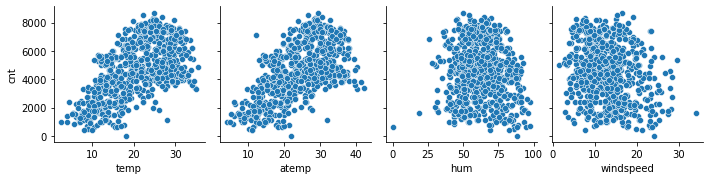

In [47]:
# Numerical columns analysis 

num_col = ['temp','atemp','hum','windspeed','cnt']
plt.figure(figsize = (20,16))
sns.pairplot(bike_df[num_col], x_vars = ['temp','atemp','hum','windspeed'], y_vars = 'cnt')
plt.show()


<b> From Above plot, we can see that target variable 'cnt' is linearly related with temp and atemp variables </b>

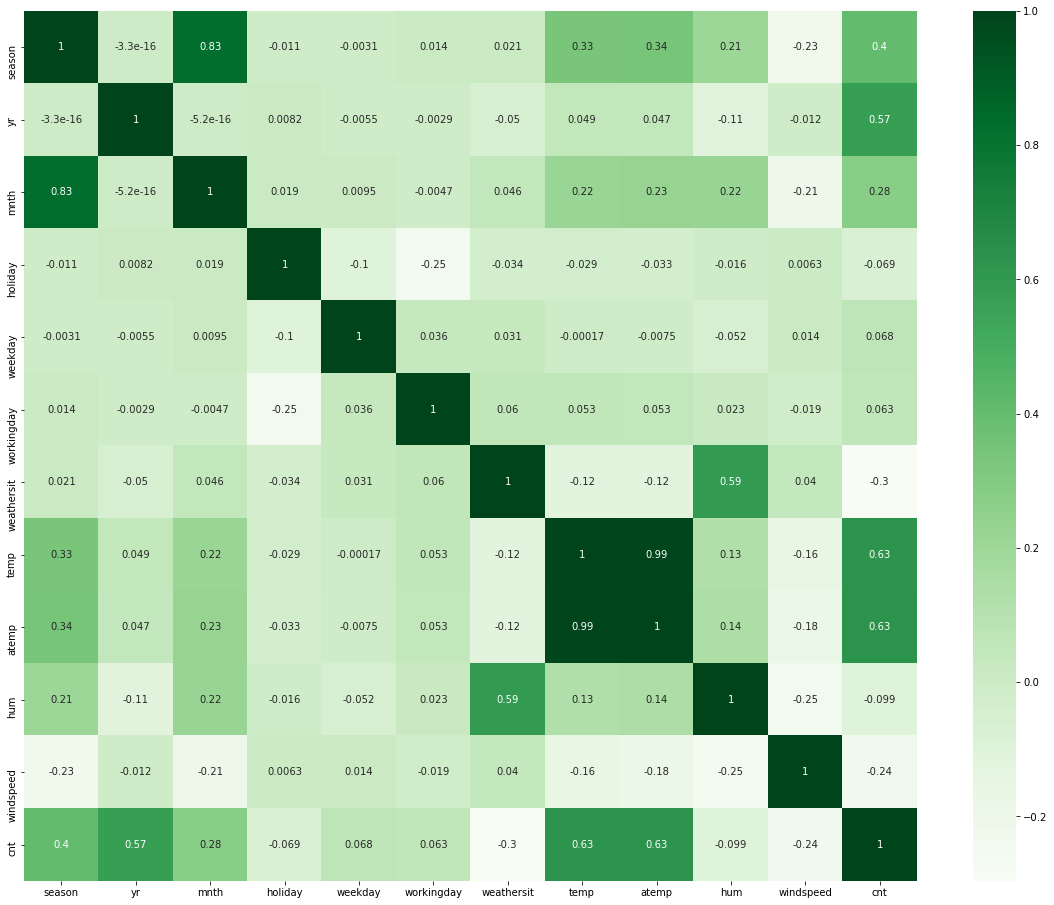

In [48]:
plt.figure(figsize = (20,16))
sns.heatmap(bike_df.corr(),annot = True , cmap = 'Greens')
plt.show()

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

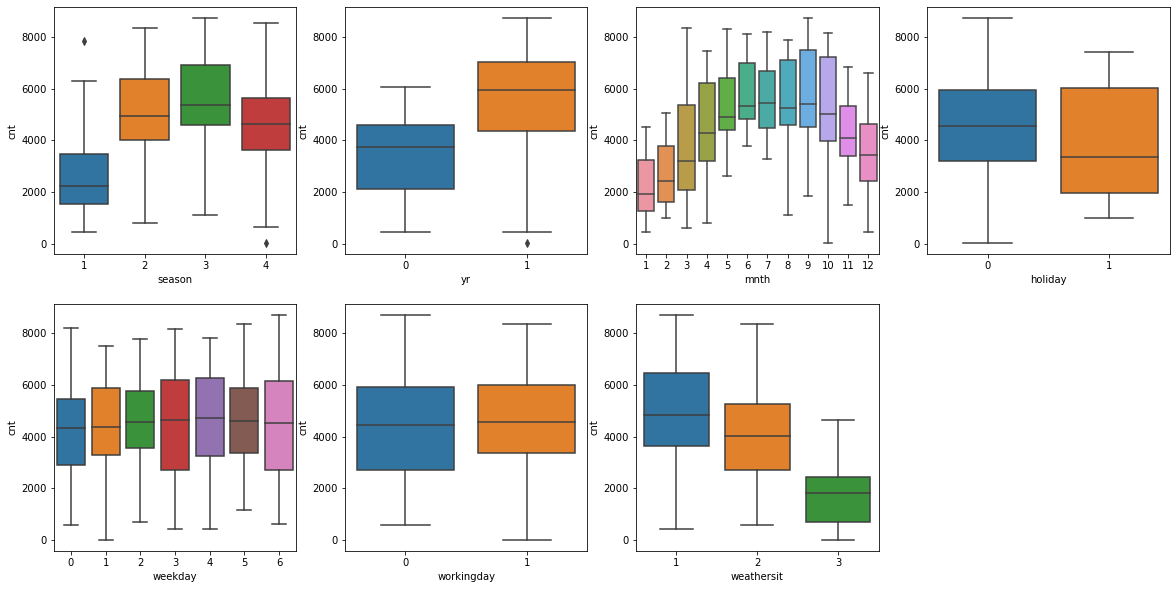

In [49]:
# categorical variable analysis

plt.figure(figsize = (20,10))
plt.subplot(2,4,1)
sns.boxplot(data = bike_df, x= 'season', y = 'cnt')
# As per data dictionary -> season (1:spring, 2:summer, 3:fall, 4:winter)

plt.subplot(2,4,2)
sns.boxplot(data = bike_df, x= 'yr', y = 'cnt')
#yr : year (0: 2018, 1:2019)
    
plt.subplot(2,4,3)
sns.boxplot(data = bike_df, x= 'mnth', y = 'cnt')
# mnth : month ( 1 to 12)

plt.subplot(2,4,4)
sns.boxplot(data = bike_df, x= 'holiday', y = 'cnt')
# holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

plt.subplot(2,4,5)
sns.boxplot(data = bike_df, x= 'weekday', y = 'cnt')
# weekday : day of the week

plt.subplot(2,4,6)
sns.boxplot(data = bike_df, x= 'workingday', y = 'cnt')
# workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

plt.subplot(2,4,7)
sns.boxplot(data = bike_df, x= 'weathersit', y = 'cnt')
    #weathersit : 
    #1: Clear, Few clouds, Partly cloudy, Partly cloudy
    #2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    #3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    #4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


From above plot analysis we can say that :
 - season 'fall' has high number of bookings
 - year 2019 has high  number of bookings as compared to 2018
 - In the mid of year from Jun to Sep booking are increased as compared to other months in year
 - If it is not holiday, than bookings are higher
 - In the Clear weather bookings are higher
 - weekday and working day variables have not effect on booking.

In [50]:
# temp and atemp are highly coorelated, we can drop one :

bike_df.drop(['temp'], axis = 1, inplace = True)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


In [51]:
# changing multiple categorical variables to catogories 

bike_df['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace = True)
bike_df['mnth'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:'May', 6:'Jun', 7:'Jul', 8:'Aug',9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace = True)
bike_df['weekday'].replace({1:'Mon',2:'Tue',3:'Wed',4:'Thur',5:'Fri',6:'Sat',0:'Sun'},inplace = True)
bike_df['weathersit'].replace({1:'Clear',2:'Mist',3:'Light_Rain'},inplace = True)
bike_df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,11.46350,43.6957,12.522300,1600


### Step 2 : Preparing Data for Modelling 

- Categorical variable Encoding 
- Splitting data into train and test set

In [52]:
# create dummy variables for data

Bike_categorical = bike_df[['season','mnth','weekday','weathersit']]
Bike_dummies = pd.get_dummies(Bike_categorical, drop_first=True)
Bike_dummies.head()
print(Bike_dummies.shape)

(730, 22)


In [53]:
# adding dummy variales to the dataset

Bike_df = bike_df[['yr','holiday','workingday','atemp','hum','windspeed','cnt']]
Bike_df = pd.concat([Bike_df,Bike_dummies],axis=1)
Bike_df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light_Rain,weathersit_Mist
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Train - Test Split

In [54]:
# Splitting Data as 80% Train set and 20% Test set

bike_train, bike_test = train_test_split(Bike_df, train_size = 0.8, random_state = 100 )
print(bike_train.shape)
print(bike_test.shape)

(584, 29)
(146, 29)


- Rescaling Features

In [55]:
# 1. instntiate object
scaler = MinMaxScaler()

# 2. create list of numerical variales 
num_vars = ['atemp','hum','windspeed','cnt']

# 3. Fit the data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light_Rain,weathersit_Mist
367,1,0,1,0.061963,0.454701,0.695175,0.254717,1,0,0,...,0,0,0,0,0,0,1,0,0,0
648,1,0,1,0.462175,0.477458,0.299450,0.868385,0,0,1,...,1,0,0,0,0,1,0,0,0,0
44,0,0,1,0.419099,0.387290,0.807474,0.217556,1,0,0,...,0,0,1,0,0,0,0,0,0,0
705,1,0,1,0.318824,0.787463,0.189819,0.573631,0,0,1,...,0,0,0,0,0,0,0,0,0,1
379,1,0,0,0.108365,0.431945,0.449210,0.263346,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [56]:
bike_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light_Rain,weathersit_Mist
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.667808,0.513175,0.649499,0.319463,0.515792,0.251712,0.246575,0.250000,...,0.092466,0.080479,0.148973,0.150685,0.154110,0.135274,0.133562,0.154110,0.027397,0.342466
std,0.500241,0.163378,0.471403,0.211663,0.144219,0.168114,0.225336,0.434369,0.431387,0.433384,...,0.289931,0.272267,0.356367,0.358048,0.361363,0.342309,0.340472,0.361363,0.163378,0.474941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.331819,0.535852,0.199177,0.350696,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.530558,0.653714,0.294764,0.522837,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.690521,0.752361,0.410413,0.691872,1.000000,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step 3 : Training the Model

In [57]:
y_train = bike_train.pop('cnt')
X_train = bike_train
print(y_train.shape)
print(X_train.shape)

(584,)
(584, 28)


#### Model 1 : p-Value analysis with statsmodel

In [58]:
# add constant
X_train_sm = sm.add_constant(X_train)

# create first model
lm1_sm = sm.OLS(y_train,X_train_sm)

# fit
lm1_sm_model = lm1_sm.fit()

# params
lm1_sm_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     123.0
Date:                Thu, 09 Jun 2022   Prob (F-statistic):          1.50e-214
Time:                        15:50:05   Log-Likelihood:                 609.09
No. Observations:                 584   AIC:                            -1162.
Df Residuals:                     556   BIC:                            -1040.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2552      0.033      7.778      0.000       0.191       0.320
yr                        0.2311      0.007     31.250      0.000       0.217       0.246
holiday                   0.0177      0.021      0.828      0.408      -0.024       0.060
workingday                0.1035      0.011      9.134      0.000       0.081       0.126
atemp                     0.4262      0.042     10.168      0.000       0.344       0.509
hum                      -0.1401      0.036     -3.854      0.000      -0.212      -0.069
windspeed                -0.1636      0.024     -6.852      0.000      -0.210      -0.117
season_spring            -0.0629      0.027     -2.301      0.022      -0.117      -0.009
season_summer             0.0343      0.024      1.424      0.155      -0.013       0.082
season_winter             0.1025      0.025      4.138      0.000       0.054       0.151
mnth_Aug                  0.0360      0.031      1.177      0.240      -0.024       0.096
mnth_Dec                 -0.0592      0.031     -1.920      0.055      -0.120       0.001
mnth_Feb                 -0.0353      0.030     -1.159      0.247      -0.095       0.025
mnth_Jan                 -0.0671      0.031     -2.140      0.033      -0.129      -0.006
mnth_Jul                 -0.0179      0.032     -0.563      0.574      -0.080       0.045
mnth_Jun                  0.0269      0.022      1.227      0.220      -0.016       0.070
mnth_Mar                  0.0013      0.024      0.056      0.955      -0.045       0.048
mnth_May                  0.0291      0.019      1.527      0.127      -0.008       0.067
mnth_Nov                 -0.0553      0.034     -1.647      0.100      -0.121       0.011
mnth_Oct                  0.0141      0.033      0.431      0.666      -0.050       0.078
mnth_Sep                  0.0860      0.029      2.932      0.004       0.028       0.144
weekday_Mon              -0.0286      0.014     -2.009      0.045      -0.057      -0.001
weekday_Sat               0.0974      0.013      7.653      0.000       0.072       0.122
weekday_Sun               0.0366      0.013      2.884      0.004       0.012       0.062
weekday_Thur             -0.0125      0.014     -0.871      0.384      -0.041       0.016
weekday_Tue              -0.0258      0.014     -1.794      0.073      -0.054       0.002
weekday_Wed              -0.0094      0.014     -0.671      0.503      -0.037       0.018
weathersit_Light_Rain    -0.2601      0.025    -10.302      0.000      -0.310      -0.210
weathersit_Mist          -0.0602      0.010     -6.199      0.000      -0.079      -0.041
==============================================================================
Omnibus:                      108.627   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarqu

####  VIF calculation for Model 1

In [59]:
vif = pd.DataFrame()
vif['Feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
2,workingday,86.29
22,weekday_Sun,20.03
21,weekday_Sat,19.59
6,season_spring,10.76
8,season_winter,8.80
7,season_summer,8.24
18,mnth_Oct,6.84
17,mnth_Nov,6.37
3,atemp,6.01
12,mnth_Jan,6.00


From the above model we can see that Prob (F-statistic) is almost zero, which means that model can be explained linearly. But as per the p-values of the coefficients, we can see that many coefficients are insignificant. Therefore we can remove them from model.

To remove insignificant variables, we can use RFE method.

#### Model 2 : RFE feature selection with sklearn

In [60]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [61]:
# Build Model with sklearn and Feature Selection
lm2_sk = LinearRegression()
lm2_sk.fit(X_train,y_train)
rfe = RFE(lm2_sk,15)
rfe = rfe.fit(X_train,y_train)

In [62]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 3),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', False, 7),
 ('mnth_Jun', False, 5),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 6),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 8),
 ('weekday_Thur', False, 12),
 ('weekday_Tue', False, 10),
 ('weekday_Wed', False, 13),
 ('weathersit_Light_Rain', True, 1),
 ('weathersit_Mist', True, 1)]

In [63]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Nov',
       'mnth_Sep', 'weekday_Sat', 'weathersit_Light_Rain', 'weathersit_Mist'],
      dtype='object')

In [64]:
X_train.columns[~rfe.support_]

Index(['season_summer', 'mnth_Aug', 'mnth_Feb', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sun',
       'weekday_Thur', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

#### Model 3

In [65]:
# p-value analysis with statsmodel after feature selection

X_train_rfe = X_train[col]
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm3_sm = sm.OLS(y_train,X_train_rfe_sm).fit()
print(lm3_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     210.9
Date:                Thu, 09 Jun 2022   Prob (F-statistic):          1.21e-220
Time:                        15:50:07   Log-Likelihood:                 591.73
No. Observations:                 584   AIC:                            -1151.
Df Residuals:                     568   BIC:                            -1082.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.32

In [66]:
vif = pd.DataFrame()
vif['Feature'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
4,hum,25.64
3,atemp,15.68
2,workingday,4.99
5,windspeed,4.19
6,season_spring,3.01
7,season_winter,2.72
14,weathersit_Mist,2.30
0,yr,2.07
12,weekday_Sat,1.90
10,mnth_Nov,1.73


#### Model 4

After using RFE feature seletion, still one variable have high vif, therefore can be droped

In [67]:
X_train_rfe = X_train_rfe.drop('hum',axis = 1)
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm4_sm = sm.OLS(y_train,X_train_rfe_sm).fit()
print(lm4_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     220.7
Date:                Thu, 09 Jun 2022   Prob (F-statistic):          3.14e-219
Time:                        15:50:08   Log-Likelihood:                 585.57
No. Observations:                 584   AIC:                            -1141.
Df Residuals:                     569   BIC:                            -1076.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

In [68]:
vif = pd.DataFrame()
vif['Feature'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
3,atemp,5.70
2,workingday,4.86
4,windspeed,4.16
5,season_spring,2.46
6,season_winter,2.37
0,yr,2.07
11,weekday_Sat,1.88
9,mnth_Nov,1.70
8,mnth_Jan,1.63
13,weathersit_Mist,1.53


#### Model 5

#### Model 6

In [69]:
X_train_rfe = X_train_rfe.drop('holiday',axis = 1)
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm6_sm = sm.OLS(y_train,X_train_rfe_sm).fit()
print(lm6_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     236.6
Date:                Thu, 09 Jun 2022   Prob (F-statistic):          9.17e-220
Time:                        15:50:08   Log-Likelihood:                 584.00
No. Observations:                 584   AIC:                            -1140.
Df Residuals:                     570   BIC:                            -1079.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [70]:
vif = pd.DataFrame()
vif['Feature'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
2,atemp,5.45
1,workingday,4.33
3,windspeed,4.14
4,season_spring,2.42
5,season_winter,2.36
0,yr,2.07
10,weekday_Sat,1.76
8,mnth_Nov,1.67
7,mnth_Jan,1.62
12,weathersit_Mist,1.53


Now, All variables have VIF < 5 and low p-values for coefficients

#### Model 7 

In [71]:
X_train_rfe = X_train_rfe.drop('workingday',axis = 1)
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm7_sm = sm.OLS(y_train,X_train_rfe_sm).fit()
print(lm7_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     238.1
Date:                Thu, 09 Jun 2022   Prob (F-statistic):          3.94e-213
Time:                        15:50:08   Log-Likelihood:                 565.45
No. Observations:                 584   AIC:                            -1105.
Df Residuals:                     571   BIC:                            -1048.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.30

In [72]:
vif = pd.DataFrame()
vif['Feature'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
2,windspeed,4.02
1,atemp,3.83
3,season_spring,2.33
4,season_winter,2.32
0,yr,2.06
7,mnth_Nov,1.67
6,mnth_Jan,1.61
11,weathersit_Mist,1.50
5,mnth_Dec,1.42
9,weekday_Sat,1.18


### Step 4 : Residual Analysis  and Assumption Validation

In [73]:
y_train_pred = lm7_sm.predict(X_train_rfe_sm)
print('r2_score on train set:', r2_score(y_train,y_train_pred))

r2_score on train set: 0.8334273757324431


#### Assumptions :

- Linearity: The relationship between X and the mean of Y is linear.
- Homoscedasticity: The variance of residual is the same for any value of X.
- Independence: Observations are independent of each other.
- Normality: For any fixed value of X, Y is normally distributed.

1. Error terms are normally distributed with mean zero(not X, Y):

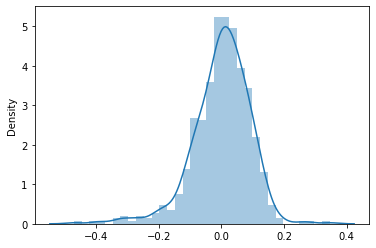

In [74]:
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

2. Error terms are independent of each other

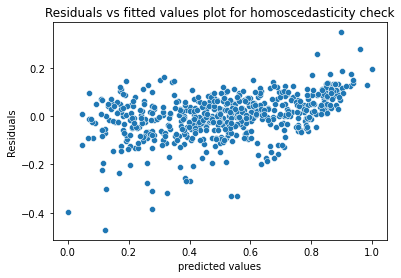

In [75]:
sns.scatterplot(y_train,res)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.show()

### Predictions and Evaluation 

In [76]:
# rescaling and transform the test data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light_Rain,weathersit_Mist
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [77]:
filtered_features = list(X_train_rfe.columns)
y_test = bike_test.pop('cnt')
X_test = bike_test[filtered_features]
print(y_test.shape)
print(X_test.shape)

(146,)
(146, 12)


In [78]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(146, 13)

In [79]:
y_test_pred = lm7_sm.predict(X_test_sm)
r2 = round(r2_score(y_test,y_test_pred),2)
print('r2_score on test set:', r2)

r2_score on test set: 0.79


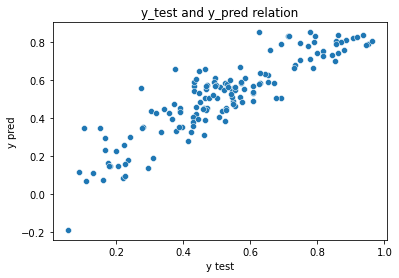

In [80]:
sns.scatterplot(y_test,y_test_pred)
plt.xlabel('y test')
plt.ylabel('y pred')
plt.title('y_test and y_pred relation')
plt.show()

In [81]:
# Adjusted r2
n= X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2


0.7710526315789474

### Interpretation

<b> 

Evaluation Matrices :
    
- Training r2 : 0.83
- Training adjusted r2 : 0.83
- Test r2 : 0.79
- test adjusted r2 : 0.77

- Variables analysis :

    - Temparature, year , month_sep are impacting positively the booking.
    - Weather Situation like rain and mist, Windspeed, Month : Nov,Dec, Jan are impacting negatively the booking. Means we can see less booking at these times. </b>
    
  